## 10-Minute YouTube Video Explanation and Tutorial:

[Concrete csMPa Prediction Model Project](https://youtu.be/_3vooZQnAi0)

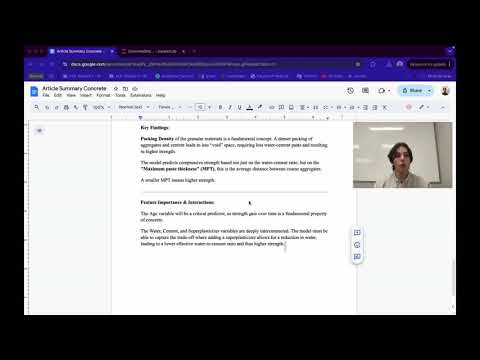

In [84]:
from IPython.display import YouTubeVideo
YouTubeVideo("_3vooZQnAi0")

# <font color=darkred>Simulation of Products of Compressed Recycled Materials</font>

In [67]:
# Preamble script block to identify host, user, and kernel
import sys
! hostname
! whoami
print(sys.executable)
print(sys.version)
print(sys.version_info)

Danny-SG-Laptop
danny-sg-laptop\dshih
C:\Users\dshih\anaconda3\python.exe
3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)]
sys.version_info(major=3, minor=12, micro=7, releaselevel='final', serial=0)


## Red PlaNet Team Contributors:
### Rivas, Andrés
### Garro, Daniela
### Hidalgo, Diego
### Shih, Danny
### Xirinachs, Manfred

## Title of the notebook: Simulation of Products of Compressed Recycled Materials
## Date: October 4th, 2025
___

In this project, we explored how to predict the strength of concrete by training a supervised learning model through multilinear regression based on a given concrete database.
## Introduction:
Concrete, just as any material, has many factors that can manipulate its strength. These factors can be referred as the inputs or features of the concrete that affect its strength. Although from the given research sources there were other variables like special gravity, this project focuses mainly in material composition (cement, slag, flyash, water, and superplasticizer) with its particle sizes (coarse and fine aggregate) (both in kg in a m^3 mixture) and drying wait time (in days) that together yield the concrete strength (in csMPa).
## Getting Started:
Manfred did research based on concrete and gathered the fundamental findings for this study here: __[Literature Research](./Article%20Summary%20Concrete%20.pdf)__. The references for this research is found at the bottom of this Jupyter Notebook.  
In addition, a simple flowchart (Fig. 1) shows the initial plan I (Danny) had for creating the model. Where I simply split the Concrete Data file into a training and test set, applied the gradient descent algorithm, and then tested for uncertainty. However, during development many challenges and considerations arose as I will soon further describe.
[![Concrete Database Flowchart (Fig. 1)](csMPaProjectFlowchart.png)](https://drive.google.com/file/d/1MwRTz3kQqGmPeNQ6RJIRi1X44doykf2v/view?usp=sharing)

## 1. If you have not, please install all the necessary libraries by running the following commands in order to later import them into the Jupyter notebook:
If you already have them installed, you can skip this step or still run the commands. They will output whether it is already installed, missing, or failed to install (perhaps if you do not have sufficient access to the internet or have software incompatibility).
+ The XLRD library is only needed if you will import the Concrete Database from the Internet since it is in XLS format not CSV that pandas already supports.

In [ ]:
pip install xlrd

In [9]:
pip install scikit-learn

^C
Note: you may need to restart the kernel to use updated packages.


## 2. Import the necessary libraries, packages, and modules we will be using:

In [68]:
import matplotlib.pyplot as plt # for visual graphing
import numpy as np # for math operations in larger data sets such as (re-)sampling
import pandas as pd # for reading the Concrete Data file as a data frame and extracting metrics from its data
import scipy # for distribution statistic
import seaborn as sns # for extended graphing operations aside of plt
# Scikit-Learn modules and functions for the Concrete Strength Prediction model training and metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm # stats for the Concrete Strength prediction model
import statistics # General purpose statistics

### Optional Graphing Theme:
Set the beautiful default theme from the Seaborn library

In [69]:
sns.set_theme() # Displays a background, grid lines, and more

## 3. Import the Concrete Database (Pick One of the Two Ways Below:)
Note that both ways obtain the same data file but they initially have different column names; hence, for uniformity, we renamed them.
### A. From the Project Directory:
```python
# Read and store the concrete database from the local directory into a variable
concrete = pd.read_csv('Concrete_Data.csv')
# Create a shorter named and editable duplicate of the original database with renamed columns
c = concrete.rename(
    columns = {
        "cement": "Cement",
        "slag": "Slag",
        "flyash": "Fly Ash",
        "water": "Water",
        "superplasticizer": "Superplasticizer",
        "coarseaggregate": "Coarse Aggregate",
        "fineaggregate": "Fine Aggregate",
        "age": "Age",
        "csMPa": "Compressive Strength (MPa)"
    }
)
```
### B. From the Internet (If used, Copy-and-Paste this Snippet Into the Empty Code Cell Below):
```python
# Useful in case the concrete data file is locally missing:
import requests # HTTP/HTTPS Request Handller Module
# Locate and obtain concrete data file
rget = requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls", allow_redirects = True)
# Store the concrete data file as a local file while keeping its name
open('Concrete_Data.xls','wb').write(rget.content);
concrete = pd.read_excel('Concrete_Data.xls')
# Create a shorter named and editable duplicate of the original database with renamed columns
c = concrete.rename(
    columns = {
        "Cement (component 1)(kg in a m^3 mixture)": "Cement",
        "Blast Furnace Slag (component 2)(kg in a m^3 mixture)": "Slag",
        "Fly Ash (component 3)(kg in a m^3 mixture)": "Fly Ash",
        "Water (component 4)(kg in a m^3 mixture)": "Water",
        "Superplasticizer (component 5)(kg in a m^3 mixture)": "Superplasticizer",
        "Coarse Aggregate (component 6)(kg in a m^3 mixture)": "Coarse Aggregate",
        "Fine Aggregate (component 7)(kg in a m^3 mixture)": "Fine Aggregate",
        "Age (day)": "Age",
        "Concrete compressive strength(MPa, megapascals)": "Compressive Strength (MPa)"
    }
)
```

In [71]:
# By default, the Materials Data file is already downloaded and placed in the proper directory. Therefore, we will pick Option A:
# Read and store the concrete database from the local directory into a variable
concrete = pd.read_csv('Materials.csv')
# Create a shorter named and editable duplicate of the original database with renamed columns
c = concrete.rename(
    columns = {
        "cement": "Cement",
        "slag": "Slag",
        "flyash": "Fly Ash",
        "water": "Water",
        "superplasticizer": "Superplasticizer",
        "coarseaggregate": "Coarse Aggregate",
        "fineaggregate": "Fine Aggregate",
        "age": "Age",
        "csMPa": "Compressive Strength (MPa)"
    }
)

In [ ]:
# Here you can test Option 3B instead of executing Option 3A:


----

## 4. Define the Features and csMPa Data

In [73]:
# Define the input and output variables
orig_i = c.iloc[:, :8] # Select all original rows and index the independent variables
orig_csMPa = c.iloc[:, 8] # Select all original rows of the dependent variable

----

## 5. Train the Concrete Strength Prediction Model using the Concrete Database (Pick One of the Two Ways Below):
### Standardizing the Features:
Before training the model, it is import to standardize the features because the concrete database has many inputs of which have varying magnitude. Even if all the features have the same units, these changes in magnitude, especially across so many features can influence the relevance of the model. Consequently, we applied standardization for the features which can help center each feature with a standard deviation of 1 and perform better predictions.
> Note that both ways obtain very similar data but the Automatic Training is less prone to errors since it is more modular.

### A. Model Using Package Functions
Quicker setup for training the model with pre-defined methods for obtaining metrics but fewer control on training the data.  
> In practice, this choice is the best due to using the `Ordinary Least Squares (OLS) Algorithm` resulting in the most precise answer.  
> However, if there are high correlations between features, the algorithm tends to break down and possibly invalidated due to the data's matrices becoming non-invertible.
```python
# Split database into a third for the testing set and the remaining for the training set
i_train, i_test, csMPa_train, csMPa_test = train_test_split(orig_i, orig_csMPa, test_size = 1 / 3, random_state = 42)

# Standardize the Concrete Data features
sc_i = StandardScaler()
i_train_scaled = sc_i.fit_transform(i_train) # fit training set only
i_test_scaled = sc_i.transform(i_test)

# Add a constant (intercept) to the independent variables
i_train_scaled_const = sm.add_constant(i_train_scaled)

# Fit the model using the Ordinary Least Squares Algorithm
model = sm.OLS(csMPa_train, i_train_scaled_const) 
result = model.fit()

# Add constant to the test set and make predictions
i_test_scaled_const = sm.add_constant(i_test_scaled)
csMPa_train_pred = result.predict(i_train_scaled_const)
csMPa_test_pred = result.predict(i_test_scaled_const)

print(result.params) # theta values

eq = ""
for i in range(len(result.params)):
    if i == 0:
        eq += f"{result.params.iloc[0]:.3f}" # str(round(result.params[0], 3))
    else:
        eq += f" + ({result.params.iloc[i]:.3f} * x_{i})"
print("csMPa Multilinear Equation:", eq, sep = "\n")

# Evaluate the model on test data
mse_train = mean_squared_error(csMPa_train, csMPa_train_pred)
mse_test = mean_squared_error(csMPa_test, csMPa_test_pred)
print("Training Set:")
print(f"Mean Squared Error: {mse_test}")
print(f"Root Mean Squared Error: {np.sqrt(mse_test)}")
print(f"R-squared: {r2_score(csMPa_train, csMPa_train_pred)}")
train_resid = csMPa_train - csMPa_train_pred
plt.scatter(csMPa_train_pred, train_resid, label = "Training Set Residual Points")
plt.axhline(0, color = 'r', label = "x-axis")
plt.xlabel("Predicted Training csMPa Values")
plt.ylabel("Training Set Residuals")
plt.title("Residual Plot")
sns.histplot(train_resid, kde = True, label = "Training Set Residuals Distribution")
plt.legend()
plt.show()
print("Test Set:")
print(f"Mean Squared Error: {mse_test}")
print(f"Root Mean Squared Error: {np.sqrt(mse_test)}")
print(f"R-squared: {r2_score(csMPa_test, csMPa_test_pred)}")
test_resid = csMPa_test - csMPa_test_pred
plt.scatter(csMPa_test_pred, test_resid, label = "Test Set Residual Points")
plt.axhline(0, color = 'r', label = "y-axis")
plt.xlabel("Predicted Test csMPa Values")
plt.ylabel("Test Set Residuals")
plt.title("Residual Plot")
sns.histplot(test_resid, kde = True, label = "Test Set Residuals Distribution")
plt.legend()
plt.show()

# Summary of the model
print(result.summary())
```

+ Open this Markdown Cell if you want to quickly take a look at the Output preview before trying option A (without the graphs). _(It is commented out below.)_
<!--const    36.317464
x1       13.289015
x2        9.929201
x3        5.591861
x4       -2.006278
x5        2.538136
x6        2.127488
x7        2.816454
x8        7.172812
dtype: float64
csMPa Multilinear Equation:
36.317 + (13.289 * x_1) + (9.929 * x_2) + (5.592 * x_3) + (-2.006 * x_4) + (2.538 * x_5) + (2.127 * x_6) + (2.816 * x_7) + (7.173 * x_8)
Training Set:
Mean Squared Error: 113.17490034824952
Root Mean Squared Error: 10.638369252298471
R-squared: 0.6224546659587635
Test Set:
Mean Squared Error: 113.17490034824952
Root Mean Squared Error: 10.638369252298471
R-squared: 0.5906579487065302
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Compressive Strength (MPa)   R-squared:                       0.622
Model:                                    OLS   Adj. R-squared:                  0.618
Method:                         Least Squares   F-statistic:                     139.5
Date:                        Wed, 06 Aug 2025   Prob (F-statistic):          1.02e-137
Time:                                16:31:01   Log-Likelihood:                -2571.1
No. Observations:                         686   AIC:                             5160.
Df Residuals:                             677   BIC:                             5201.
Df Model:                                   8                                         
Covariance Type:                    nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3175      0.395     92.033      0.000      35.543      37.092
x1            13.2890      1.115     11.915      0.000      11.099      15.479
x2             9.9292      1.084      9.156      0.000       7.800      12.059
x3             5.5919      0.975      5.738      0.000       3.678       7.505
x4            -2.0063      1.006     -1.994      0.047      -3.982      -0.031
x5             2.5381      0.675      3.760      0.000       1.213       3.863
x6             2.1275      0.874      2.434      0.015       0.411       3.844
x7             2.8165      1.034      2.723      0.007       0.785       4.848
x8             7.1728      0.415     17.275      0.000       6.358       7.988
==============================================================================
Omnibus:                        5.987   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                5.829
Skew:                          -0.214   Prob(JB):                       0.0542
Kurtosis:                       3.146   Cond. No.                         8.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.-->

const    36.317464
x1       13.289015
x2        9.929201
x3        5.591861
x4       -2.006278
x5        2.538136
x6        2.127488
x7        2.816454
x8        7.172812
dtype: float64
csMPa Multilinear Equation:
36.317 + (13.289 * x_1) + (9.929 * x_2) + (5.592 * x_3) + (-2.006 * x_4) + (2.538 * x_5) + (2.127 * x_6) + (2.816 * x_7) + (7.173 * x_8)
Training Set:
Mean Squared Error: 113.17490034824952
Root Mean Squared Error: 10.638369252298471
R-squared: 0.6224546659587635


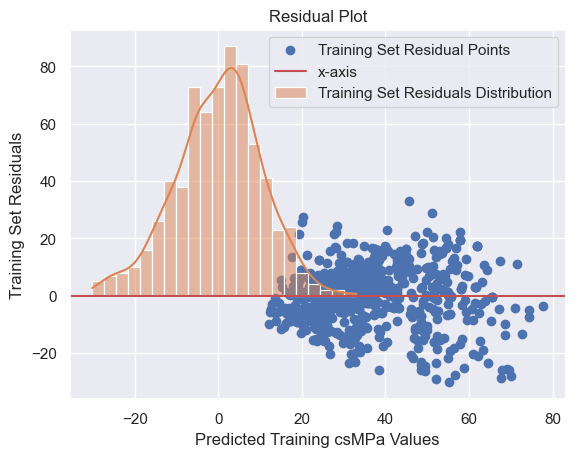

Test Set:
Mean Squared Error: 113.17490034824952
Root Mean Squared Error: 10.638369252298471
R-squared: 0.5906579487065302


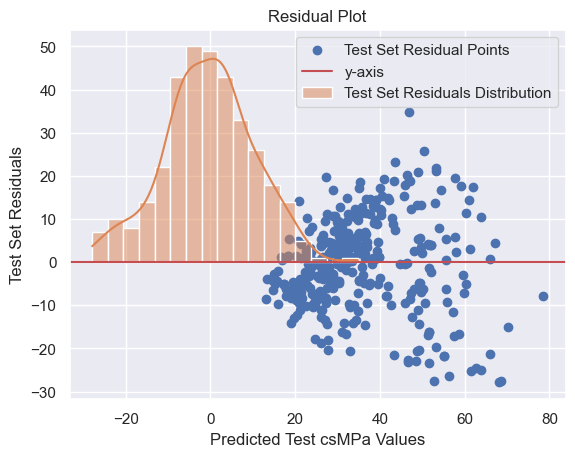

                                OLS Regression Results                                
Dep. Variable:     Compressive Strength (MPa)   R-squared:                       0.622
Model:                                    OLS   Adj. R-squared:                  0.618
Method:                         Least Squares   F-statistic:                     139.5
Date:                        Thu, 07 Aug 2025   Prob (F-statistic):          1.02e-137
Time:                                10:16:31   Log-Likelihood:                -2571.1
No. Observations:                         686   AIC:                             5160.
Df Residuals:                             677   BIC:                             5201.
Df Model:                                   8                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

In [75]:
# You can test Option 5A here instead of Option 5B:
# Split database into a third for the testing set and the remaining for the training set
i_train, i_test, csMPa_train, csMPa_test = train_test_split(orig_i, orig_csMPa, test_size = 1 / 3, random_state = 42)

# Standardize the Concrete Data features
sc_i = StandardScaler()
i_train_scaled = sc_i.fit_transform(i_train) # fit training set only
i_test_scaled = sc_i.transform(i_test)

# Add a constant (intercept) to the independent variables
i_train_scaled_const = sm.add_constant(i_train_scaled)

# Fit the model using the Ordinary Least Squares Algorithm
model = sm.OLS(csMPa_train, i_train_scaled_const) 
result = model.fit()

# Add constant to the test set and make predictions
i_test_scaled_const = sm.add_constant(i_test_scaled)
csMPa_train_pred = result.predict(i_train_scaled_const)
csMPa_test_pred = result.predict(i_test_scaled_const)

print(result.params) # theta values

eq = ""
for i in range(len(result.params)):
    if i == 0:
        eq += f"{result.params.iloc[0]:.3f}" # str(round(result.params[0], 3))
    else:
        eq += f" + ({result.params.iloc[i]:.3f} * x_{i})"
print("csMPa Multilinear Equation:", eq, sep = "\n")

# Evaluate the model on test data
mse_train = mean_squared_error(csMPa_train, csMPa_train_pred)
mse_test = mean_squared_error(csMPa_test, csMPa_test_pred)
print("Training Set:")
print(f"Mean Squared Error: {mse_test}")
print(f"Root Mean Squared Error: {np.sqrt(mse_test)}")
print(f"R-squared: {r2_score(csMPa_train, csMPa_train_pred)}")
train_resid = csMPa_train - csMPa_train_pred
plt.scatter(csMPa_train_pred, train_resid, label = "Training Set Residual Points")
plt.axhline(0, color = 'r', label = "x-axis")
plt.xlabel("Predicted Training csMPa Values")
plt.ylabel("Training Set Residuals")
plt.title("Residual Plot")
sns.histplot(train_resid, kde = True, label = "Training Set Residuals Distribution")
plt.legend()
plt.show()
print("Test Set:")
print(f"Mean Squared Error: {mse_test}")
print(f"Root Mean Squared Error: {np.sqrt(mse_test)}")
print(f"R-squared: {r2_score(csMPa_test, csMPa_test_pred)}")
test_resid = csMPa_test - csMPa_test_pred
plt.scatter(csMPa_test_pred, test_resid, label = "Test Set Residual Points")
plt.axhline(0, color = 'r', label = "y-axis")
plt.xlabel("Predicted Test csMPa Values")
plt.ylabel("Test Set Residuals")
plt.title("Residual Plot")
sns.histplot(test_resid, kde = True, label = "Test Set Residuals Distribution")
plt.legend()
plt.show()

# Summary of the model
print(result.summary())

### B. Manually Training the Model (More Control such as Obtaining More Metrics like a Cost Function): 
> Personally, we like this method more because it not only can avoid the non-invertability concern with option A if certain features are highly correlated (in other words having multicollinearity) but effectively work with large data sets without involving matrix multiplication.  
> However, the Gradient Descent Algorithm will not exactly converge, just as the OLS Algorithm would, but still only be slightly off.
Uses the Gradient Descent Algorithm described below using sympy as a demonstration for training the Concrete Strength Prediction Model:

In [ ]:
# Sympy for math operations and symbols
from sympy.abc import alpha, i, k, m, n, theta, x
from sympy import diff, Eq, Function, Rational, Sum, symbols, UnevaluatedExpr
# Symbols have too much boilerplate and no complete symbol auto-conversion
# PDE symbol using diff only instantiates with two variables not only with theta (hence static unicodes were used)
theta__Tx, x__i, y__i, x_j__i, partialJ, partialtheta_j, theta_j = symbols('theta^T, x^(i), y^(i), x_j^(i), \u2202J(\u03B8), \u2202\u03B8_j, theta_j')
h_theta = Function('h_theta')
eq_1 = Eq(h_theta(x), theta__Tx * x)
J = Function('J')
add_2 = Sum((h_theta(x__i) - y__i) ** 2, (i, 1, m))
eq_2 = Eq(J(theta), (1 / (2 * m)) * add_2) # separate fractions
add_3 = Sum((h_theta(x__i) - y__i) * x_j__i, (i, 1, m)) # make clear subscript first and then superscript
eq_3 = Eq(partialJ / partialtheta_j, (1 / m) * add_3) # separate fractions
eq_4 = Eq(theta_j, theta_j - (alpha * UnevaluatedExpr(partialJ / partialtheta_j))) # order reverses
print("Gradient Descent Algorithm:")
print("Take the transpose of the theta values and multiply by the features (Hypothesis Function)")
display(eq_1)
print("For all training sets:")
display(eq_2)
print("Optimization algorithm to get optimized values of θ")
display(eq_3)
display(eq_4)

In [ ]:
# Standardize the Concrete Data features
sc_i = StandardScaler()

# Randomly pick 2/3 of the Concrete data for training and the rest for testing
random = c.sample(n = round(c.shape[0] * (2 / 3)), replace = False)
training_set = random.iloc[0:round(random.shape[0] * (1 / 3)), :] # print(len(training_set))
test_set = random.iloc[round(random.shape[0] * (1 / 3)):, :] # print(len(test_set))

# Separate out the features and the response variables in the training and test sets 
i_train = training_set.iloc[:, :8].values
i_train_scaled = sc_i.fit_transform(i_train) # fit training set only

i_test = test_set.iloc[:, :8].values
i_test_scaled = sc_i.transform(i_test)

csMPa_train = training_set.iloc[:, 8].values
csMPa_train = np.reshape(csMPa_train, (len(csMPa_train), 1))

csMPa_test = test_set.iloc[:, 8].values
csMPa_test = np.reshape(csMPa_test, (len(csMPa_test), 1))

# print("x_train_Shape:", np.shape(i_train))
# print("y_train_Shape:", np.shape(csMPa_train))
# print("x_test_Shape:", np.shape(i_test))
# print("y_test_Shape:", np.shape(csMPa_test))

# Transpose and stack a row of ones vertically to the 'i_train and i_test' for the purposes of vectorization
i_train_trans = np.transpose(i_train_scaled)
i_train_aug = np.vstack((np.ones((1, len(i_train_scaled))), i_train_trans)) # print("i_train_aug:", np.shape(i_train_aug))
i_test_trans = np.transpose(i_test_scaled)
i_test_aug = np.vstack((np.ones((1, len(i_test_scaled))), i_test_trans)) # print("i_test_aug:", np.shape(i_test_aug))

# Define theta as array of zeros
theta = np.zeros((9, 1))
print("theta:", np.shape(theta))

# Implement the gradient descent algorithm:
num_of_iter = np.arange(10_000)
alpha = 0.003
m_train = len(i_train)
m_test = len(i_test)

costs = []

# Iteration loop
for i in num_of_iter:
    h = np.transpose(theta) @ i_train_aug # Hypothesis function
    J = (1 / (2 * m_train)) * np.sum((np.transpose(h) - csMPa_train) ** 2) # Cost J
    costs.append(J)  # Append cost
    dJdthetaj = (1 / m_train) * (i_train_aug @ (np.transpose(h) - csMPa_train)) # Derivative of cost function
    theta -= alpha * dJdthetaj  # Update theta values
    
print(theta)

eq = ""
for i in range(len(theta)):
    if i == 0:
        eq += f"{theta[0, 0]:.3f}"
    else:
        eq += f" + ({theta[i, 0]:.3f} * x_{i})"
print("csMPa Multilinear Equation:", eq, sep = "\n")

# Test the model on training set
h_train = np.transpose(theta) @ i_train_aug
csMPa_train_pred = np.transpose(h_train)
plt.scatter(csMPa_train, csMPa_train_pred, color = 'r')
plt.plot([csMPa_train.min(), csMPa_train.max()], [csMPa_train_pred.min(), csMPa_train_pred.max()], color = 'black', lw = 2)
plt.xlabel("csMPa_train")
plt.ylabel("csMPa_train_pred")
plt.title("Predictions vs. Actual csMPa Values in the Training Set")
plt.show()

# Test the model on the test set
h_test = np.transpose(theta) @ i_test_aug
csMPa_test_pred = np.transpose(h_test)
plt.scatter(csMPa_test, csMPa_test_pred, color='r')
plt.plot([csMPa_test.min(), csMPa_test.max()], [csMPa_test_pred.min(), csMPa_test_pred.max()], color = 'black', lw = 2)
plt.xlabel("csMPa_test")
plt.ylabel("csMPa_test_pred")
plt.title("Predictions vs. Actual csMPa Values in the Test Set")
plt.show()

# Plot cost function vs. number of iterations
plt.plot(num_of_iter, costs)
plt.xlabel("Number of Iterations")
plt.ylabel("Cost Function")
plt.title("Cost Function vs. Number of Iterations")
plt.show()

# Computing the MSE, RMSE, and Residual error (epsilon value) for the predictions made on the training set
mse_train = (1 / m_train) * np.sum((csMPa_train - csMPa_train_pred) ** 2)
print("Training Set:")
print(f"Mean Squared Error: {mse_train}")
print(f"Root Mean Squared Error: {np.sqrt(mse_train)}")
print(f"R-squared: {r2_score(csMPa_train, csMPa_train_pred)}")
train_resid = csMPa_train - csMPa_train_pred
plt.scatter(csMPa_train_pred, train_resid, label = "Training Set Residual Points")
plt.axhline(0, color = 'r', label = "x-axis")
plt.xlabel("Predicted Training csMPa Values")
plt.ylabel("Training Set Residuals")
plt.title("Residual Plot")
sns.histplot(train_resid, kde = True, label = "Training Set Residuals Distribution")
plt.legend()
plt.show()

# Computing the MSE, RMSE, and Residual error (epsilon value) for the predictions made on the test set
mse_test = (1 / m_test) * np.sum((csMPa_test - csMPa_test_pred) ** 2)
print("Test Set:")
print(f"Mean Squared Error: {mse_test}")
print(f"Root Mean Squared Error: {np.sqrt(mse_test)}")
print(f"R-squared: {r2_score(csMPa_test, csMPa_test_pred)}")
test_resid = csMPa_test - csMPa_test_pred
plt.scatter(csMPa_test_pred, test_resid, label = "Test Set Residual Points")
plt.axhline(0, color = 'r', label = "x-axis")
plt.xlabel("Predicted Test csMPa Values")
plt.ylabel("Test Set Residuals")
plt.title("Residual Plot")
sns.histplot(test_resid, kde = True, label = "Test Set Residuals Distribution")
plt.legend()
plt.show()

----

## 6. Concrete Strength Predictor Function Using a Model (from Above):
In order to quickly fetch specific values for concrete mixtures and obtain its respective strength, a simple function can accomplish the goal. As seen below, each parameter, in order according to the Concrete Data, is assigned as a float type to prevent other data types like string or a list for safety and return a concrete strength csMPa value as a float as well. Within the `mix` function you can see that the passed arguments will be turned into a list (`pred_csMPa`) and eventually passed over to the trained concrete model prediction which as a list will output the same prediction values hence can be accessed through index notation. Lastly, since all the features had at most one decimal place, except Age (in days) which is in integers and the corresponding Concrete Strength (in csMPa) values with two decimal places, we decided to round the prediction to two decimal places as well.
+ In the Concrete Data, there are 3 values that were optional such as slag, fly ash, and superplasticizer. We think it would had been nice if we could had made these parameters optional by setting them to default at zero. However, Python will not allow this notation unless the parameters with default values are defined at the beginning of the function unlike other programming languages. Changing the order of the parameters, although valid in practice when properly assigned explicitly the parameters to the arguments, it would had created confusion and that is a priority to keep in mind. Finding a proper solution to this problem would had been helpful other than modifying the columns of the data frames to fit this syntax.

In theory, both options listed below predict similar csMPa results. You can try them separately later by refreshing the cells or kernel in your own to check the differences!

### Option A. OLS Algorithm:
Using the OLS algorithm, this is how to predict the csMPa output for a given combination of features using the trained model.
> Note that it is necessary to scale the predicted csMPa since the features were initially scaled!
```python
# Option A: Mix Function for the Gradient Descent Algorithm:
def mix(
    cement: float,
    slag: float, # = 0
    fly_ash: float, # = 0
    water: float,
    superplasticizer: float, # = 0
    coarse_aggregate: float,
    fine_aggregate: float,
    age: float
) -> float:
    pred_csMPa = pd.DataFrame([[cement, slag, fly_ash, water, superplasticizer, coarse_aggregate, fine_aggregate, age]], columns = orig_i.columns)
    pred_scaled = sc_i.transform(pred_csMPa)
    return round(result.predict(sm.add_constant(pred_scaled, has_constant = 'add'))[0], 2)
```
#### Example (for Option A. OLS Algorithm):
```python
print(mix(200.0, 11.0, 150.0, 130.0, 3.0, 850.0, 435.0, 5.0))
```
##### Tested Output (May Vary Depending on Step 5 Due to Random Sampling):
$>>>$ 11.03

In [76]:
# You can test Option 6A instead of Option 6B below:
# Option A: Mix Function for the Gradient Descent Algorithm:
def mix(
    cement: float,
    slag: float, # = 0
    fly_ash: float, # = 0
    water: float,
    superplasticizer: float, # = 0
    coarse_aggregate: float,
    fine_aggregate: float,
    age: float
) -> float:
    pred_csMPa = pd.DataFrame([[cement, slag, fly_ash, water, superplasticizer, coarse_aggregate, fine_aggregate, age]], columns = orig_i.columns)
    pred_scaled = sc_i.transform(pred_csMPa)
    return round(result.predict(sm.add_constant(pred_scaled, has_constant = 'add'))[0], 2)

### Option B. Gradient Descent Algorithm:
Using the Gradient Descent algorithm, this is how to predict the csMPa output for a given combination of features using the trained model.
> Since previously, we used Option B (as the default) in step 5, we will stick to Option B.

In [ ]:
# Option B: Mix Function for the Gradient Descent Algorithm:
def mix(
    cement: float,
    slag: float, # = 0
    fly_ash: float, # = 0
    water: float,
    superplasticizer: float, # = 0
    coarse_aggregate: float,
    fine_aggregate: float,
    age: float
) -> float:
    pred_csMPa = np.array([cement, slag, fly_ash, water, superplasticizer, coarse_aggregate, fine_aggregate, age]).reshape(1, -1)
    pred_csMPa_trans = np.transpose(pred_csMPa)
    # Standardize using the same scaler from training
    i_scaled = sc_i.transform(pred_csMPa).reshape(-1, 1) # shape: (8, 1)
    # Add intercept (bias)
    i_aug = np.vstack([np.ones((1, 1)), i_scaled]) # shape: (9, 1)
    # Predict
    csMPa_pred = theta.T @ i_aug # shape: (1, 1)
    return round(float(csMPa_pred[0, 0]), 2)

#### Example (for Option B. Gradient Descent Algorithm):
```python
print(mix(200.0, 11.0, 150.0, 130.0, 3.0, 850.0, 435.0, 5.0))
```
##### Tested Output (May Vary Depending on Step 5 Due to Random Sampling):
$>>>$ 16.34

----

## 7. Concrete Strength Predictor Function Using a Model (from Above):
Concrete Strength Interface putting everything together and adding modes to facilitate the concrete interface. Initially the user will get asked whether to remove the outliers of the data set to improve the concrete model's accuracy (which could work depending on the Concrete data frame). There is a user interface mode so that users can input their own values to receive a specific Concrete Strength prediction, a demo mode that displays the Concrete Strength results of a given concrete mixtures, a random mode that generates random values that are never beyond the minimum or maximum for each of the features, and a statistics mode that allows users to inspect the data in their own way whether to focus on one feature at at time, two at a time, or all features at once. Finally, the design of this interface is not perfect because more metrics and analysis methods could had been implemented and explain like the Mean Absolute Error or Standard Error Mean and their respective graphs (including that of the MSE, RSME, and other forms of errors and uncertainties); nonetheless, this interface allows a working system for those interested to find the Strength of Concrete based on the used features.
> Note: Rather than calling 5 given concrete mixtures by printing its result, we created a data frame to store those values and called them instead so the data frame can dynamically be studied.
```python
print(mix(175.0, 13.0, 172.0, 156.0, 4.0, 1000.0, 856.0, 3.0))
print(mix(320.0, 0.0, 0.0, 192.0, 0.0, 970.0, 850.0, 7.0))
print(mix(320.0, 0.0, 126.0, 209.0, 5.70, 860.0, 856.0, 28.0))
print(mix(320.0, 73.0, 54.0, 181.0, 6.0, 972.0, 773.0, 45.0))
print(mix(530.0, 359.0, 200.0, 247.0, 32.0, 1145.0, 992.0, 365.0))
```

Concrete Strength Predictor and Statistical Analyzer:
Enter 'q' if you want to quit the program at any time.


Type `0` for entering a mode or `1` for analyzing the concrete database: 
Type `0` for entering a mode or `1` for analyzing the concrete database: 0
Type `u` for User Interface Mode, `d` for Demo Mode, or `r` for Random Mode: d


Demo Mode:
   Cement  BlastFurnaceSlag  FlyAsh  Water  Superplasticizer  CoarseAggregate  \
0   175.0              13.0   172.0  156.0               4.0           1000.0   
1   320.0               0.0     0.0  192.0               0.0            970.0   
2   320.0               0.0   126.0  209.0               5.7            860.0   
3   320.0              73.0    54.0  181.0               6.0            972.0   
4   530.0             359.0   200.0  247.0              32.0           1145.0   

   FineAggregate    Age  Compressive Strength (MPa) Prediction  
0          856.0    3.0                                  26.69  
1          850.0    7.0                                  22.01  
2          856.0   28.0                                  33.70  
3          773.0   45.0                                  40.47  
4          992.0  365.0                                 166.29  


Type `0` for entering a mode or `1` for analyzing the concrete database: 1


Concrete Data Frame:
   Cement   Slag  Fly Ash  Water  Superplasticizer  Coarse Aggregate  \
0   540.0    0.0      0.0  162.0               2.5            1040.0   
1   540.0    0.0      0.0  162.0               2.5            1055.0   
2   332.5  142.5      0.0  228.0               0.0             932.0   
3   332.5  142.5      0.0  228.0               0.0             932.0   
4   198.6  132.4      0.0  192.0               0.0             978.4   

   Fine Aggregate  Age  Compressive Strength (MPa)  
0           676.0   28                       79.99  
1           676.0   28                       61.89  
2           594.0  270                       40.27  
3           594.0  365                       41.05  
4           825.5  360                       44.30  
      Cement   Slag  Fly Ash  Water  Superplasticizer  Coarse Aggregate  \
1025   276.4  116.0     90.3  179.6               8.9             870.1   
1026   322.2    0.0    115.6  196.0              10.4             817.9   
102

Do you want to remove outliers? [y / n] n


Type:
a: Show Pairplot Between All Features
b: Show Heat Map Between All Features
c: Analyze One Feature
d: Select Two Features


 d


Select the First Variable:
0: Cement
1: Slag
2: Fly Ash
3: Water
4: Superplasticizer
5: Coarse Aggregate
6: Fine Aggregate
7: Age
8: Compressive Strength (MPa)


 0


Select Another Variable:
0: Cement
1: Slag
2: Fly Ash
3: Water
4: Superplasticizer
5: Coarse Aggregate
6: Fine Aggregate
7: Age
8: Compressive Strength (MPa)


 8


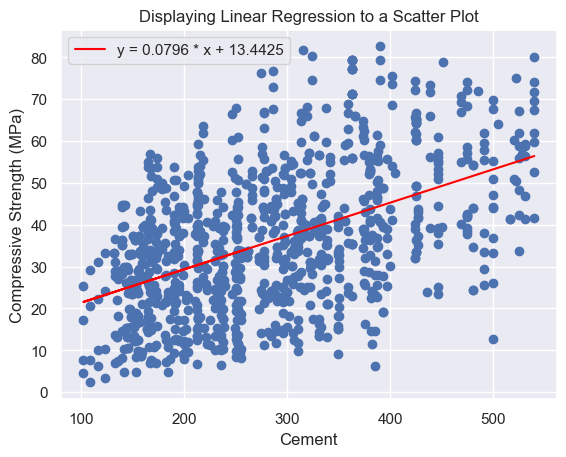

Intercept: 13.442528112399923
Coefficients: [0.07958034]
Covariance: 869.1430218800418
R2: 0.24783661989797434
MSE: 209.7113198295558
RMSE: 14.48141290860653


Type `0` for entering a mode or `1` for analyzing the concrete database: 1


Concrete Data Frame:
   Cement   Slag  Fly Ash  Water  Superplasticizer  Coarse Aggregate  \
0   540.0    0.0      0.0  162.0               2.5            1040.0   
1   540.0    0.0      0.0  162.0               2.5            1055.0   
2   332.5  142.5      0.0  228.0               0.0             932.0   
3   332.5  142.5      0.0  228.0               0.0             932.0   
4   198.6  132.4      0.0  192.0               0.0             978.4   

   Fine Aggregate  Age  Compressive Strength (MPa)  
0           676.0   28                       79.99  
1           676.0   28                       61.89  
2           594.0  270                       40.27  
3           594.0  365                       41.05  
4           825.5  360                       44.30  
      Cement   Slag  Fly Ash  Water  Superplasticizer  Coarse Aggregate  \
1025   276.4  116.0     90.3  179.6               8.9             870.1   
1026   322.2    0.0    115.6  196.0              10.4             817.9   
102

Do you want to remove outliers? [y / n] n


Type:
a: Show Pairplot Between All Features
b: Show Heat Map Between All Features
c: Analyze One Feature
d: Select Two Features


 c


Select a Feature:
0: Cement
1: Slag
2: Fly Ash
3: Water
4: Superplasticizer
5: Coarse Aggregate
6: Fine Aggregate
7: Age
8: Compressive Strength (MPa)


 0


Select an Analysis:
a: Display Distribution Graphs and Statistics
b: Draw a Box Plot Graph
c: Describe the Feature
d: Other Metrics


 a


95% Confidence Interval: [35.5426, 37.0923]
p-value: 0.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000


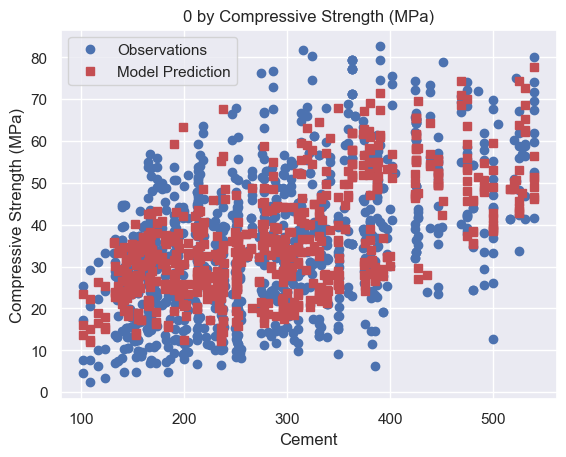

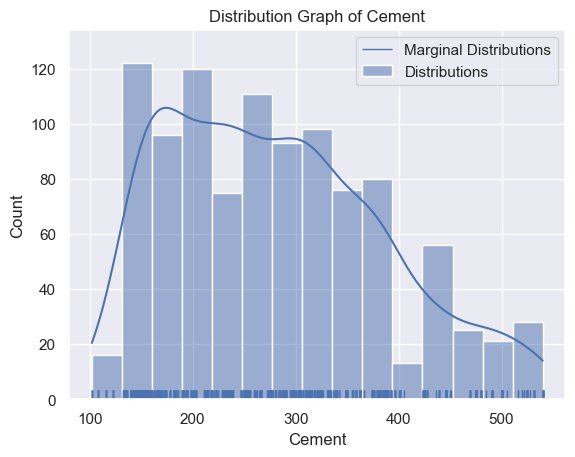

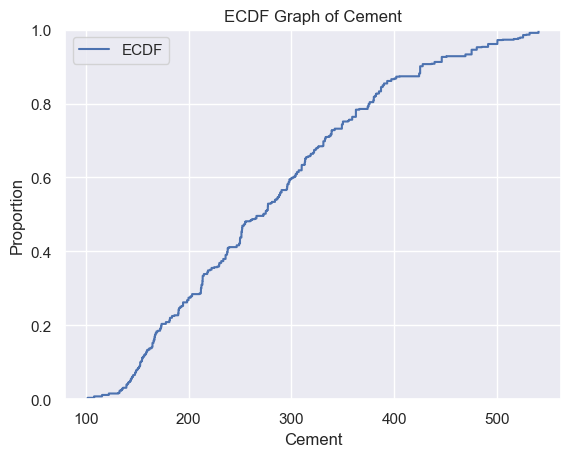

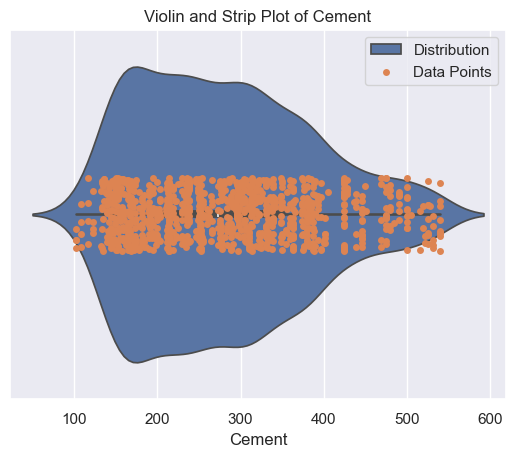

KeyboardInterrupt: Interrupted by user

In [77]:
prod_df = pd.DataFrame(
    {
        "Cement": [175.0, 320.0, 320.0, 320.0, 530.0],
        "BlastFurnaceSlag": [13.0, 0.0, 0.0, 73.0, 359.0],
        "FlyAsh": [172.0, 0.0, 126.0, 54.0, 200.0],
        "Water": [156.0, 192.0, 209.0, 181.0, 247.0],
        "Superplasticizer": [4.0, 0.0, 5.70, 6.0, 32.0],
        "CoarseAggregate": [1000.0, 970.0, 860.0, 972.0, 1145.0],
        "FineAggregate": [856.0, 850.0, 856.0, 773.0, 992.0],
        "Age": [3.0, 7.0, 28.0, 45.0, 365.0]
    }
)

def modes(show: str):
    prod_csMPa = []
    args = []
    if "u" == show:
        print("User Interface Mode:")
        for i in range(c.shape[1] - 1): # 9 total columns - 1 output Concrete Strength column = 8 features
            args.append(float(input(f"Input a value for {c.columns[i]}:")))
        print(f"Predicted csMPa: {mix(*args)}")
    elif "d" == show:
        print("Demo Mode:")
        for i in range(prod_df.shape[0]):
            args = prod_df.iloc[i, :].tolist()
            prod_csMPa.append(mix(*args)) # print(f"{args}:", mix(*args))
        prod_df['Compressive Strength (MPa) Prediction'] = prod_csMPa
        print(prod_df) # print(prod_df.style.format("{:.1f}").hide())
    else:
        print("Random Mode:")
        for i in range(c.shape[1] - 1):
            rand = np.random.randint(low = c.iloc[:, i].min(), high = c.iloc[:, i].max())
            print(f"Random value for {c.columns[i]}: {rand}")
            args.append(rand)
        # Singular Splat Operator: Break down a list into items to pass them as arguments
        print(f"Predicted csMPa: {mix(*args)}")

def stats(show: str):
    x = y = 0
    if ("n" == show or "no" == show or "y" == show or "yes" == show):
        print("Type:")
        print("a: Show Pairplot Between All Features")
        print("b: Show Heat Map Between All Features")
        print("c: Analyze One Feature")
        print("d: Select Two Features")
        show = input().lower()
        if "a" == show: # Could use a switch case perhaps or guard clause?
            sns.pairplot(c, diag_kind = 'hist')
            plt.show()
        elif "b" == show:
            c_corr = c.corr()
            print(c_corr)
            sns.heatmap(c_corr)
            plt.show()
        elif "c" == show:
            print("Select a Feature:")
            for i in range(c.shape[1]):
                print(f"{i}: {c.columns[i]}")
            show = input().lower()
            for i in range(c.shape[1]):
                if str(i) == show:
                    x = i
                    print("Select an Analysis:")
                    print("a: Display Distribution Graphs and Statistics")
                    print("b: Draw a Box Plot Graph")
                    print("c: Describe the Feature")
                    print("d: Other Metrics")
                    show = input()
                    if "a" == show:
                        # If trained with the OLS Algorithm:
                        ci = result.conf_int()
                        ci_feature = ci.iloc[x]
                        p_value = result.pvalues.iloc[x]
                        print(f"95% Confidence Interval: [{ci_feature[0]:.4f}, {ci_feature[1]:.4f}]")
                        print(f"p-value: {p_value:.120f}")
                        plt.title(f"{x} by {c.columns[-1]}")
                        plt.plot(c[c.columns[x]], c.iloc[:, -1], 'o') # Actual csMPa data scatter plot
                        plt.plot(i_train[c.columns[x]], result.predict(), marker = 's', color = 'r', lw = 0) # Regression line where the features sampled must have same the dimension (use i_train)
                        plt.xlabel(f"{c.columns[x]}")
                        plt.ylabel(f"{c.columns[-1]}")
                        plt.legend(['Observations', 'Model Prediction'])
                        plt.show()
                        ###
                        plt.title(f"Distribution Graph of {c.columns[x]}")
                        sns.histplot(data = c, x = c.columns[x], kde = True, label = "Distributions") # Same as using distplot and similar to barplot
                        sns.rugplot(data = c, x = c.columns[x], label = "Marginal Distributions")
                        plt.legend()
                        plt.show()
                        plt.title(f"ECDF Graph of {c.columns[x]}")
                        sns.ecdfplot(data = c, x = c.columns[x], label = "ECDF") # sns.displot(data = c, x = c.columns[x], kind="ecdf")
                        plt.legend()
                        plt.show()
                        plt.title(f"Violin and Strip Plot of {c.columns[x]}")
                        sns.violinplot(data = c, x = c.columns[x], label = "Distribution")
                        sns.stripplot(data = c, x = c.columns[x], label = "Data Points") # Similar to swarmplot but can overlap
                        plt.legend()
                        plt.show()
                    elif "b" == show:
                        sns.boxplot(data = c, x = c.columns[x]) # sns.boxenplot(data = c, x = c.columns[x])
                        plt.show()
                    elif "c" == show:
                        print(c[c.columns[x]].transpose().describe())
                        print("Variance:", c[c.columns[x]].var())
                        print("Skewness:", scipy.stats.skew(c[c.columns[x]]))
                        print("Kurtosis:", scipy.stats.kurtosis(c[c.columns[x]]))
                        print("Values:", c[c.columns[x]].value_counts(), sep = "\n")
                        print("Unique Values:", c[c.columns[x]].nunique())
                    elif "d" == show:
                        print("Range:", c[c.columns[x]].max() - c[c.columns[x]].min()) # np.ptp() Peak-to-Peak
                        # print(f"Mean: {stats.mean(c[c.columns[x]])}")
                        print(f"Harmonic Mean: {statistics.harmonic_mean(c[c.columns[x]])}")
                        print(f"Geometric Mean: {statistics.geometric_mean(c[c.columns[x]])}")
                    else:
                        print("Please select an option 'a' through 'd' only or 'q' to quit the program!")
                    break
            else:
                print("An invalid variable was provided. Please try again.")
        elif "d" == show:
            print("Select the First Variable:")
            for i in range(c.shape[1]):
                print(f"{i}: {c.columns[i]}")
            show = input()
            for i in range(c.shape[1]):
                if show == str(i):
                    x = c.columns[i]
                    break
            else:
                print("An invalid first variable was provided. Please try again.")
            if (0 != x):
                print("Select Another Variable:")
                for j in range(c.shape[1]):
                    print(f"{j}: {c.columns[j]}")
                show = input()
                for j in range(c.shape[1]):
                    if show == str(j):
                        y = c.columns[j]
                        break
                else:
                    print("An invalid second variable was provided. Please try again.")
            # sns.lmplot(x = x, y = y, ci = 95)
            if (0 != x and 0 != y):
                model = LinearRegression()
                model.fit(c[[x]], c[y])
                y_pred = model.predict(c[[x]])
                plt.title("Displaying Linear Regression to a Scatter Plot")
                plt.scatter(c[x], c[y])
                plt.plot(c[x], y_pred, color = 'red', label = f"y = {model.coef_[0]:.4f} * x + {model.intercept_:.4f}") # plt.plot([c[x].min(), c[x].max()], y_pred.min(), y_pred.max()])
                plt.xlabel(f"{x}")
                plt.ylabel(f"{y}")
                plt.legend()
                plt.show()
                print("Intercept:", model.intercept_)
                print("Coefficients:", model.coef_)
                print("Covariance:", np.cov(c[x], c[y])[0][1])
                print("R2:", r2_score(c[y], y_pred))
                print("MSE:", mean_squared_error(c[y], y_pred))
                print("RMSE:", np.sqrt(mean_squared_error(c[y], y_pred)))
        else:
            print("Please select an option 'a' through 'd' only or 'q' to quit the program!")
    else:
        print("Please select either 'y' or 'n' to remove outliers.")

def main():
    # Make certain variables accessible
    global choice # user input
    global c # concrete data frame
    choice = ""
    print("Concrete Strength Predictor and Statistical Analyzer:")
    print("Enter 'q' if you want to quit the program at any time.")
    while "q" != choice: # Could had use is_running = True idea instead...
        choice = input("Type `0` for entering a mode or `1` for analyzing the concrete database:")
        if "0" == choice:
            choice = input("Type `u` for User Interface Mode, `d` for Demo Mode, or `r` for Random Mode:").lower()
            if "u" == choice or "d" == choice or "r" == choice:
                modes(choice)
            else:
                print("Please pick one of the modes as instructed.")
        elif "1" == choice:
            print("Concrete Data Frame:")
            print(c.head(), c.tail(), sep = "\n")
            print(c.info())
            choice = input("Do you want to remove outliers? [y / n]").lower()
            if ("y" == choice or "yes" == choice):
                print("Pick the variable you want to remove outliers from:")
                for i in range(c.shape[1]):
                    print(f"{i}: {c.columns[i]}")
                choice = input().lower()
                for i in range(c.shape[1]):
                    if str(i) == choice:
                        # for i in range(c.shape[1] - 1):
                        q1 = np.percentile(c[c.columns[i]], 0.25)
                        q3 = np.percentile(c[c.columns[i]], 0.75)
                        iqr = q3 - q1 # or: iqr = scipy.stats.iqr(c[c.columns[i]])
                        # 1.5 IQR default rule
                        lb = q1 - (1.5 * iqr)
                        ub = q3 + (1.5 * iqr)
                        c = c[(c[c.columns[i]] >= lb) & (c[c.columns[i]] <= ub)] # remove the outliers for the selected feature
                        stats(choice)
                        # print("Number of samples in c:", len(c))
                else:
                    print("An invalid value for selecting a variable was provided. Please try again.")
            elif ("n" == choice or "no" == choice):
                stats(choice)
            else:
                print("Please try again and pick whether to keep or remove outliers.")
        else:
            continue
    else:
        print("Program Ended.")

# Execute the main program
main()

# Metadata:
main.info = "Final project developed for the Computational Thinking with Data Science course."
main.version = "v1.0.0"

----

## 8. Project Conclusion:
Overall, this project was a revelation for us to comprehend what it means to be a data scientist and applying computational thinking via the computational (programming) method, one that resembles the scientific method. Through various trial and error iterrations, we were able to overcome many complications by breaking down problems and attempting them at different angles. We enjoyed learning about concrete and how these models worked. However, we do agree that there are many concepts that could had been included and refined.

----

## 9. The Next Steps:
### What can be Improved:
As soon as we started developing the design for Concrete Strength prediction, we were not sure how to display the information whether from code execution to output or rather giving a user the ability to manipulate the interface. Since we decided to allow the user to manipulate the data, we decided to leave statistical evaluation for the user instead but it would had been better if all metrics results were more deeply explained. Having other tools like going backwards into the system or forward, a .txt export file of the user inputs and output, or even parameters so users can pick a database would had been nice but we did what we could. These tools would had improved the user behavior just as allowing the user to select a concrete database, the amount of data they want to train, or give specific parameters on training the model using a picked algorithm. Lastly, aside of better user experience, we learned that data scientists should be very clear and explicit. Whether documenting their work or removing boilerplate, it is essential to these systems.

In fact, for that reason we even provided some metadata into the main concrete interface, however, we believe in Jupyter Notebook, such syntax like:
```python
# Metadata: (Jupyter Notebook doesn't work)
# __main__.info = "Final project developed for the Computational Thinking with Data Science course."
# __main__.version = "v1.0.0"

# if __name__ == __main__:
#     main()
```
is not properly detected unlike a (.py) Python module.

I, Danny, think it is possible to use bootstrapping for uncertainties of certain features, but I felt that would have been too much clutter for the program and therefore decided to exclude it. What I realized is that sometimes data is not about how much we can have, but how what we have is used!

### Problems That We Had:
Aside of time management, some difficult problems we faced included:
- Ensuring all boolean statements for the concrete interface worked
- Finding the confidence interval using the Gradient Descent Algorithm for a specific variable
- Properly removing outliers for a specific variable of the Concrete Data using the 1.5 IQR rule
- Using sympy for math instead of LaTeX because symbols were difficult to use
- Serializing our code to be concise and readable. We are confident that in upcoming projects, together we will be able to better avoid these pitfalls
- Attempting to display subplots like Seaborn's pairplot does for displaying the errors of the of the predictions as done in Lab 23

Thank you for reading!

----

## 10. References:
### Model Building
- Many Jupyter Notebooks from previous work (specifically statistics notebooks like Lecture 23 - Multiple Linear Regression, Lab 23, and Assignment 8 that bootstrapped csMPa instead).
- Lecture Slides and notes taken during lectures.
- Documentation from the used libraries.

### Literature Research
-  Ahsanul Kabir, Md Monjurul Hasan, Khasro Miah, “ Strength Prediction Model for Concrete”, ACEE Int. J. on Civil and Environmental Engineering, Vol. 2, №1, Aug 2013.

- Castro, A.L. & Liborio, J.B.L. & Valenzuela, Federico & Pandolfelli, Victor. (2008). The application of rheological concepts on the evaluation of high-performance concrete workability. American Concrete Institute, ACI Special Publication. 119-131.  copy at: http://54.243.252.9/engr-1330-psuedo-course/CECE-1330-PsuedoCourse/6-Projects/P-ConcreteStrength/ArtigoHPC026_CASTROetalfinal.pdf

- de Larrard, François & Sedran, Thierry. (2002). Mixture-proportioning of high-performance concrete. Cement and Concrete Research. 32. 1699-1704. 10.1016/S0008-8846(02)00861-X. copy at: http://54.243.252.9/engr-1330-psuedo-course/CECE-1330-PsuedoCourse/6-Projects/P-ConcreteStrength/Mixture-ProportioningCCR-deLarrardSedran-full.pdf

- I-Cheng Yeh, “ Modeling of strength of high performance concrete using artificial neural networks,” Cement and Concrete Research, Vol. 28, №12, pp. 1797–1808 (1998). https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength

- Laskar, Aminul Islam. (2011). Mix design of high-performance concrete. Materials Research, 14(4), 429-433. Epub November 21, 2011.https://doi.org/10.1590/S1516-14392011005000088 or http://54.243.252.9/engr-1330-psuedo-course/CECE-1330-PsuedoCourse/6-Projects/P-ConcreteStrength/Mix_Design_of_High-performance_Concrete.pdf

- Paudel, S., Pudasaini, A., Shrestha, R. K., Kharel, E. (July, 2023). Compressive strength of concrete material using machine learning techniques. Cleaner Engineering and Technology, Vol. 15. https://doi.org/10.1016/j.clet.2023.100661